In [1]:
import lal

def make_list_hv(file):
    list_hv = []
    with open(file, 'r') as f:
        data = []
        for line in f:
            if line[0] == '#':
                pass
            elif line == '\n':
                hv = list(map(lambda l: int(l.split('\t')[6]), data))
                list_hv.append(hv)
                data = []
            else:
                data.append(line[:-1])
        if len(data) > 0:
            hv = list(map(lambda l: int(l.split('\t')[6]), data))
            list_hv.append(hv)
    return list_hv

list_hv = make_list_hv("P21CE2E2.conllu")
print(list_hv)

[[4, 4, 4, 0, 4, 4, 8, 4, 4, 9, 9, 14, 14, 9, 16, 14], [4, 4, 4, 0, 4, 4, 8, 4, 4, 9, 9, 14, 14, 9, 16, 14], [4, 4, 4, 0, 4, 4, 8, 4, 4, 9, 9, 14, 14, 9, 16, 14], [4, 4, 4, 0, 4, 4, 8, 4, 4, 9, 9, 14, 14, 9, 16, 14], [4, 4, 4, 0, 4, 4, 8, 4, 4, 9, 9, 14, 14, 9, 16, 14], [4, 4, 4, 0, 4, 4, 8, 4, 4, 9, 9, 14, 14, 9, 16, 14], [4, 4, 4, 0, 4, 4, 8, 6, 8, 9, 4, 14, 14, 11, 16, 14, 14, 17], [4, 4, 4, 0, 4, 4, 8, 6, 8, 9, 4, 14, 14, 11, 16, 14, 14, 17], [4, 4, 4, 0, 4, 4, 8, 4, 4, 9, 9, 14, 14, 9, 16, 14, 16, 17, 18, 23, 23, 21, 0], [4, 4, 4, 0, 4, 4, 8, 6, 8, 9, 4, 14, 14, 11, 16, 14, 14, 17, 18, 0, 0], [4, 4, 4, 0, 4, 4, 8, 6, 8, 9, 4, 14, 14, 11, 16, 14, 14, 17, 18, 0, 0], [4, 4, 4, 0, 4, 4, 8, 6, 8, 9, 4, 14, 14, 11, 16, 14, 14, 17, 18, 0, 0], [4, 4, 4, 0, 4, 4, 8, 4, 4, 9, 9, 14, 14, 9, 16, 14, 16, 17, 18, 23, 23, 23, 0, 23, 26, 23, 26], [4, 4, 4, 0, 4, 4, 8, 4, 4, 9, 9, 14, 14, 9, 16, 14, 16, 17, 18, 23, 23, 23, 0, 23, 26, 23], [4, 4, 4, 0, 4, 4, 8, 4, 4, 9, 9, 14, 14, 9, 16, 14, 16, 17

In [2]:
def tutorial(list_hv):
    info = []
    # for hv in list_hv:

    dg = lal.graphs.from_head_vector_to_directed_graph(list_hv[11])
    n = dg.get_num_nodes()
    # for u in range(0, n):
    #     head = dg.get_in_neighbours(u)
    #     if len(head) == 1:
    #         gov = head[0]
    #         edge_length = abs(gov - u)

    #Dr_1 = the expected value of D we would find in a uniformly random permutation of the words in the sentence
    Dr_1 = lal.properties.exp_sum_edge_lengths(dg.to_undirected()) 
    Dr_2 = 0
    D = lal.linarr.sum_edge_lengths(dg)
    Dmin = 0
    Dr_2_actual = 0

    # ccs[0], ccs[1]
    ccs = lal.properties.compute_connected_components(dg)
    for u in range(0, n):
        print(f"{u} is in connected component {ccs.get_cc_node(u)} and is vertex {ccs.get_label_graph_node_to_cc_node(u)} within its component")
#         for cc in ccs:
#             rt = lal.graphs.rooted_tree(cc)
            
            
#             Dmin_cc = lal.linarr.min_sum_edge_lengths(rt)
#             Dmin += Dmin_cc[0]

            
#             Dr_cc = lal.properties.exp_sum_edge_lengths(rt)
#             Dr_2 += Dr_cc
#             Dr_2_actual = Dr_2_actual + lal.linarr.sum_edge_lengths(rt)

#         Omega_1 = (Dr_1 - D)/(Dr_1 - Dmin)
#         # print(Omega_1)

#         Omega_2 = (Dr_2 - D)/(Dr_2 - Dmin)
#         # print(Omega_2)

#         # print("Dr_1=", Dr_1)
#         # print("Dr_2=", Dr_2)
#         data = (Omega_1, Omega_2, Dr_1, D, Dr_2, Dr_2_actual)
#         info.append(data)
#     return info

# info = tutorial(list_hv)
tutorial(list_hv)

0 is in connected component 0 and is vertex 0 within its component
1 is in connected component 0 and is vertex 2 within its component
2 is in connected component 0 and is vertex 3 within its component
3 is in connected component 0 and is vertex 1 within its component
4 is in connected component 0 and is vertex 4 within its component
5 is in connected component 0 and is vertex 5 within its component
6 is in connected component 0 and is vertex 9 within its component
7 is in connected component 0 and is vertex 7 within its component
8 is in connected component 0 and is vertex 10 within its component
9 is in connected component 0 and is vertex 15 within its component
10 is in connected component 0 and is vertex 6 within its component
11 is in connected component 0 and is vertex 11 within its component
12 is in connected component 0 and is vertex 12 within its component
13 is in connected component 0 and is vertex 8 within its component
14 is in connected component 0 and is vertex 16 within

In [3]:
print(list_hv[11])
dg = lal.graphs.from_head_vector_to_directed_graph(list_hv[11])
print(dg)
n = dg.get_num_nodes()
print(n)

[4, 4, 4, 0, 4, 4, 8, 6, 8, 9, 4, 14, 14, 11, 16, 14, 14, 17, 18, 0, 0]
out:
0:
1:
2:
3: 0 1 2 4 5 10
4:
5: 7
6:
7: 6 8
8: 9
9:
10: 13
11:
12:
13: 11 12 15 16
14:
15: 14
16: 17
17: 18
18:
19:
20:
in:
0: 3
1: 3
2: 3
3:
4: 3
5: 3
6: 7
7: 5
8: 7
9: 8
10: 3
11: 13
12: 13
13: 10
14: 15
15: 13
16: 13
17: 16
18: 17
19:
20:
21


In [4]:
def tutorial(list_hv):
    info = []
    edge_lengths = []
    for hv in list_hv:

        dg = lal.graphs.from_head_vector_to_directed_graph(hv)
        n = dg.get_num_nodes()
        edge_length = 0
        for u in range(0, n):
            head = dg.get_in_neighbors(u)
            if len(head) == 1:
                gov = head[0]
                edge_length += abs(gov - u)
        edge_lengths.append(edge_length/n)
        # ccs[0], ccs[1]
        ccs = lal.properties.compute_connected_components(dg)
        for i in range(0, ccs.size()):

            Dr_1 = lal.properties.exp_sum_edge_lengths(ccs[i].to_undirected())
            # print(f"Dr_1: {Dr_1}")
            Dr_2 = 0
            D = lal.linarr.sum_edge_lengths(ccs[i])
            Dmin = 0
            Dr_2_actual = 0

            # print(type(ccs[i]))
            # print("=====================================")
            
            mini_ccs = ccs[i].get_connected_components()
            # for u in range(0, ccs[i].get_num_nodes()):
                # print(f"    {u} in the connected component is {ccs.get_label_cc_node_to_graph_node(i, u)} in the original graph")
                # print(ccs.get_label_cc_node_to_graph_node(i, u))
            for mini_cc in mini_ccs:
                rt = lal.graphs.rooted_tree(mini_cc)
                Dmin_cc = lal.linarr.min_sum_edge_lengths(rt)
                Dmin += Dmin_cc[0]

                Dr_cc = lal.properties.exp_sum_edge_lengths(rt)
                Dr_2 += Dr_cc
                Dr_2_actual = Dr_2_actual + lal.linarr.sum_edge_lengths(rt)
            
            try:
                Omega_1 = (Dr_1 - D)/(Dr_1 - Dmin)
                # print(Omega_1)
                Omega_2 = (Dr_2 - D)/(Dr_2 - Dmin)
            except ZeroDivisionError:
                Omega_1 = 0
                Omega_2 = 0

            data = (Omega_1, Omega_2, Dr_1, D, Dr_2, Dr_2_actual)
            info.append(data)
        # rt = lal.graphs.rooted_tree(ccs[i])
        # print(rt)



        # Dmin_cc = lal.linarr.min_sum_edge_lengths(rt)
        # print(f"Dmin_cc: {Dmin_cc}")
    #     Dmin += Dmin_cc[0]


    #     Dr_cc = lal.properties.exp_sum_edge_lengths(rt)
    #     Dr_2 += Dr_cc
    #     Dr_2_actual = Dr_2_actual + lal.linarr.sum_edge_lengths(rt)

    #     Omega_1 = (Dr_1 - D)/(Dr_1 - Dmin)
    #     # print(Omega_1)

    #     Omega_2 = (Dr_2 - D)/(Dr_2 - Dmin)
    #     # print(Omega_2)

    #     # print("Dr_1=", Dr_1)
    #     # print("Dr_2=", Dr_2)

    return info, edge_lengths

info, edge_lengths = tutorial(list_hv)
print(info)
print(edge_lengths)
# tutorial(list_hv)

[(0.7894736842105263, 0.7894736842105263, 85.0, 40, 85.0, 50), (0.7894736842105263, 0.7894736842105263, 85.0, 40, 85.0, 50), (0.7894736842105263, 0.7894736842105263, 85.0, 40, 85.0, 50), (0.7894736842105263, 0.7894736842105263, 85.0, 40, 85.0, 50), (0.7894736842105263, 0.7894736842105263, 85.0, 40, 85.0, 50), (0.7894736842105263, 0.7894736842105263, 85.0, 40, 85.0, 50), (0.6822033898305084, 0.6822033898305084, 107.66666666666666, 54, 107.66666666666666, 63), (0.6822033898305084, 0.6822033898305084, 107.66666666666666, 54, 107.66666666666666, 63), (0.8636363636363636, 0.8636363636363636, 120.0, 44, 120.0, 57), (1.0, 1.0, 5.0, 3, 5.0, 3), (0.7222222222222222, 0.7222222222222222, 120.0, 55, 120.0, 64), (0, 0, 0.0, 0, 0.0, 0), (0, 0, 0.0, 0, 0.0, 0), (0.7222222222222222, 0.7222222222222222, 120.0, 55, 120.0, 64), (0, 0, 0.0, 0, 0.0, 0), (0, 0, 0.0, 0, 0.0, 0), (0.7222222222222222, 0.7222222222222222, 120.0, 55, 120.0, 64), (0, 0, 0.0, 0, 0.0, 0), (0, 0, 0.0, 0, 0.0, 0), (0.8636363636363636

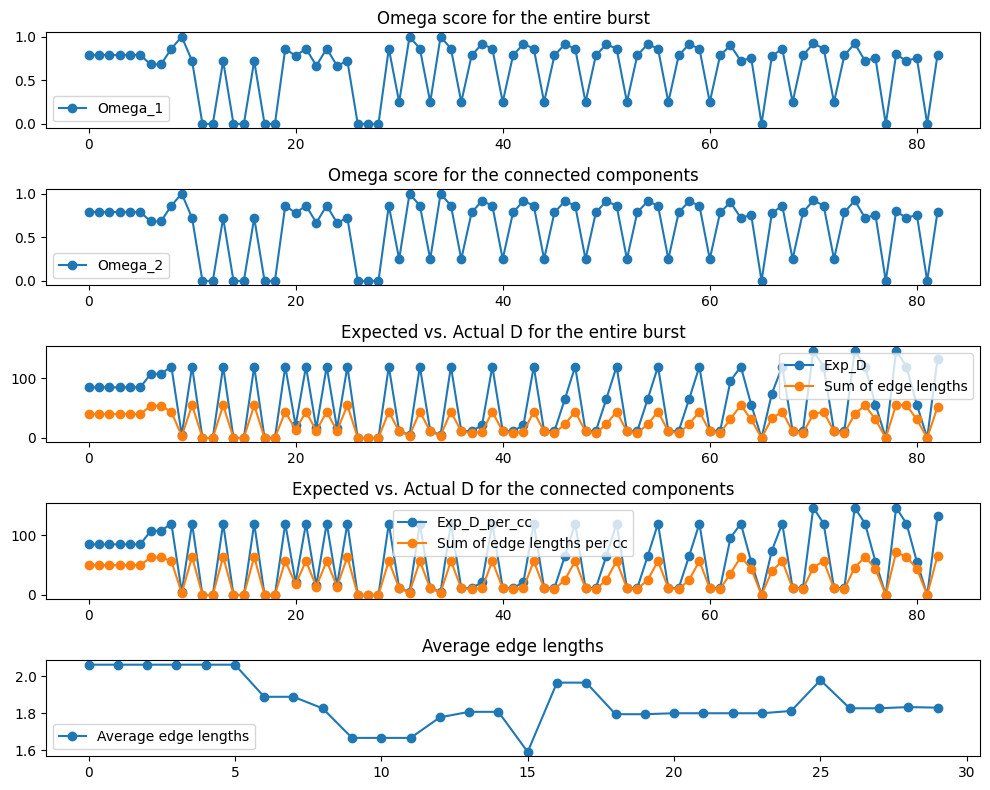

In [7]:
import matplotlib.pyplot as plt

# Unpacking the tuples into separate lists for each element
Omega_1, Omega_2, Dr_1, D, Dr_2, Dr_2_actual = zip(*info)

# Plotting each element on a separate subplot, combining Exp_D and Sum of edge lengths on the same plots for comparison
fig, axs = plt.subplots(5, 1, figsize=(10, 8))  # Reduced to 4 subplots

axs[0].plot(Omega_1, '-o', label='Omega_1')
axs[0].set_title('Omega score for the entire burst')
axs[0].legend()

axs[1].plot(Omega_2, '-o', label='Omega_2')
axs[1].set_title('Omega score for the connected components')
axs[1].legend()

# Combining Exp_D and Sum of edge lengths for the entire burst on the same subplot
axs[2].plot(Dr_1, '-o', label='Exp_D')
axs[2].plot(D, '-o', label='Sum of edge lengths')
axs[2].set_title('Expected vs. Actual D for the entire burst')
axs[2].legend()

# Combining Exp_D_per_cc and Sum of edge lengths per cc for the connected components on the same subplot
axs[3].plot(Dr_2, '-o', label='Exp_D_per_cc')
axs[3].plot(Dr_2_actual, '-o', label='Sum of edge lengths per cc')
axs[3].set_title('Expected vs. Actual D for the connected components')
axs[3].legend()

axs[4].plot(edge_lengths, '-o', label='Average edge lengths')
axs[4].set_title('Average edge lengths')
axs[4].legend()

plt.tight_layout()
plt.show()